# Codebook  
**Authors:** Patrick Guo  
Documenting existing data files of DaanMatch with information about location, owner, "version", source etc.

In [218]:
import boto3
import pandas as pd
import numpy as np 
import os
from collections import Counter
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

# Andhra_Pradesh_Gram_Panchayat

## TOC:
* [About this dataset](#1)
* [What's in this dataset](#2)
* [Codebook](#3)
    * [Missing values](#3.1)
    * [Summary statistics](#3.2)
* [Columns](#4)
    * [S. No.](#4.1)
    * [District](#4.2)
    * [Mandal](#4.3)
    * [Panchayat](#4.4)
    * [Gram Panchayat Special officer Name](#4.5)
    * [Mobile Number](#4.6)
    * [Address for Communication](#4.7)

**About this dataset**  <a class="anchor" id="1"></a>  
Data provided by: The Ministry of Panchayati Raj  
Source: https://www.panchayat.gov.in/documents/20126/75657/Andhra+Pradesh+Gram+Panchayat.xlsx/e1b39a3d-d726-fd91-68c8-3d7cd42755a4?t=1556532428214  
Type: xlsx  
Last modified: May 29, 2021, 19:53:36 (UTC-07:00)  
Size: 894.3 KB 

In [17]:
path = "s3://daanmatchdatafiles/DaanMatch_DataFiles/Andhra Pradesh Gram Panchayat.xlsx"
xl = pd.ExcelFile(path)
print(xl.sheet_names)
# Load sheet
AndhraPradeshGramPanchayat = xl.parse("Gram Panchayat")
# Reset index
AndhraPradeshGramPanchayat.head()

['Gram Panchayat']


,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
0,1,Ananthapur,Ananthapur,A.Narayanapuram,Anwar Basha,9.496189e+09,Sarpanch\nA.Narayanapuram Gram Panchayat \nAt-...
1,2,Ananthapur,Ananthapur,Akuthotapalli,C Obulamma,9.490610e+09,Sarpanch\nAkuthotapalli Gram Panchayat \nAt- A...
2,3,Ananthapur,Ananthapur,Alamuru,SURESH,8.790998e+09,Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...
3,4,Ananthapur,Ananthapur,Anantapur(R),H M Basha,9.703327e+09,Sarpanch\nAnantapur(R) Gram Panchayat \nAt- An...
4,5,Ananthapur,Ananthapur,Ankampalli,P Venkatesh Kumar,9.985021e+09,Sarpanch\nAnkampalli Gram Panchayat \nAt- Anka...


**What's in this dataset?** <a class="anchor" id="2"></a>

In [13]:
print("Shape:", AndhraPradeshGramPanchayat.shape)
print("Rows:", AndhraPradeshGramPanchayat.shape[0])
print("Columns:", AndhraPradeshGramPanchayat.shape[1])
print("Each row is a Gram Panchayat.")

Shape: (12918, 7)
Rows: 12918
Columns: 7
Each row is a Gram Panchayat.


In [15]:
AndhraPradeshGramPanchayat_columns = [column for column in AndhraPradeshGramPanchayat_df.columns]
AndhraPradeshGramPanchayat_columns

['S. No.',
 'District',
 'Mandal',
 'Panchayat',
 'Gram Panchayat Special officer Name',
 'Mobile Number',
 'Address for Communication']

**Codebook** <a class="anchor" id="3"></a>

In [23]:
AndhraPradeshGramPanchayat_columns = [column for column in AndhraPradeshGramPanchayat_df.columns]
AndhraPradeshGramPanchayat_description = ["Index",
                                          "District (Region for vooting)",
                                          "Mandal (local government area)", 
                                          "Panchayat (village)", 
                                          "Name of Gram Panchayat special officer", 
                                          "Mobile Number", 
                                          "Communication Address"]
AndhraPradeshGramPanchayat_dtypes = [dtype for dtype in AndhraPradeshGramPanchayat_df.dtypes]

data = {"Column Name": AndhraPradeshGramPanchayat_columns, "Description": AndhraPradeshGramPanchayat_description, "Type": AndhraPradeshGramPanchayat_dtypes}
AndhraPradeshGramPanchayat_codebook = pd.DataFrame(data)
AndhraPradeshGramPanchayat_codebook

,Column Name,Description,Type
0,S. No.,Index,int64
1,District,District name,object
2,Mandal,Mandal (local government area),object
3,Panchayat,Panchayat (village),object
4,Gram Panchayat Special officer Name,Name of Gram Panchayat special officer,object
5,Mobile Number,Mobile Number,float64
6,Address for Communication,Communication Address,object


**Missing values** <a class="anchor" id="3.1"></a>

In [38]:
AndhraPradeshGramPanchayat.isnull().sum()

S. No.                                  0
District                                0
Mandal                                  0
Panchayat                               0
Gram Panchayat Special officer Name    17
Mobile Number                          21
Address for Communication               0
dtype: int64

**Summary statistics** <a class="anchor" id="3.2"></a>

Not applicable because all are qualitative values.

## Columns
<a class="anchor" id="4"></a>

### S. No.
<a class="anchor" id="4.1"></a>
Index

In [180]:
column = AndhraPradeshGramPanchayat["S. No."]
column

0            1
1            2
2            3
3            4
4            5
         ...  
12913    12914
12914    12915
12915    12916
12916    12917
12917    12918
Name: S. No., Length: 12918, dtype: int64

In [181]:
print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:value for key, value in counter.items() if value > 1}
print("Duplicates:", duplicates)

No. of unique values: 12918
Duplicates: {}


### District
<a class="anchor" id="4.2"></a>
District (region of voting
13 unique values.

In [184]:
column = AndhraPradeshGramPanchayat["District"]
column

0          Ananthapur
1          Ananthapur
2          Ananthapur
3          Ananthapur
4          Ananthapur
             ...     
12913    YSR District
12914    YSR District
12915    YSR District
12916    YSR District
12917    YSR District
Name: District, Length: 12918, dtype: object

In [185]:
print("Unique values:", column.unique())
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

# Table of number of each class
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="District", value_name="Count")
table

Unique values: ['Ananthapur' 'Chittoor' 'East Godavari' 'Guntur' 'Krishna' 'Kurnool'
 'Prakasam' 'SPSR Nellore' 'Srikakulam' 'Visakhapatnam' 'Vizianagaram'
 'West Godavari' 'YSR District']
No. of unique values: 13
Invalid: 0


,District,Count
0,Ananthapur,1003
1,Chittoor,1363
2,East Godavari,1069
3,Guntur,1011
4,Krishna,970
5,Kurnool,889
6,Prakasam,1028
7,SPSR Nellore,940
8,Srikakulam,1100
9,Visakhapatnam,925


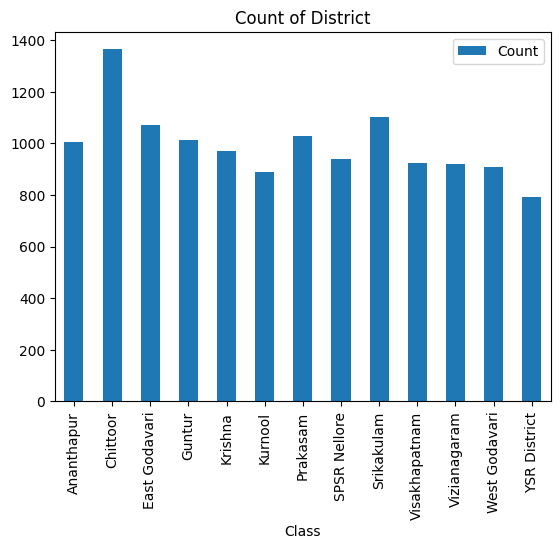

In [170]:
# Plot number of each class
table.plot.bar(x="District", y="Count")
ax = plt.title("Count of District")
plt.xlabel("Class")
plt.xticks(rotation = 90)
plt.show()

### Mandal
<a class="anchor" id="4.3"></a>
Mandal (local government area)  
648 unique values

In [173]:
column = AndhraPradeshGramPanchayat["Mandal"]
column

0        Ananthapur
1        Ananthapur
2        Ananthapur
3        Ananthapur
4        Ananthapur
            ...    
12913    Vontimitta
12914    Vontimitta
12915    Vontimitta
12916    Vontimitta
12917    Vontimitta
Name: Mandal, Length: 12918, dtype: object

In [174]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

# Table of number of each class
counter = dict(Counter(column))
count = { key:[value] for key, value in counter.items()}
table = pd.DataFrame.from_dict(count)
table = table.melt(var_name="Mandal", value_name="Count").sort_values("Count", ascending = False)
table

No. of unique values: 648
Invalid: 0


,Mandal,Count
256,Gudur,59
275,Unguturu,54
177,Seethanagaram,51
76,Ramachandrapuram,48
423,Kondapuram,47
...,...,...
636,Gopavaram,7
322,Pagidyala,7
302,Maddikera East,7
94,Kurabalakota,6


### Panchayat
<a class="anchor" id="4.4"></a>
Panchayat (village)  
10878 unique values  
1112 duplicates

In [176]:
column = AndhraPradeshGramPanchayat["Panchayat"]
column

0        A.Narayanapuram
1          Akuthotapalli
2                Alamuru
3           Anantapur(R)
4             Ankampalli
              ...       
12913     Narvakatipalle
12914        Pennaperuru
12915     Rachagudipalle
12916            Salabad
12917         Vontimitta
Name: Panchayat, Length: 12918, dtype: object

In [177]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))


# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Panchayats", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

No. of unique values: 10878
Invalid: 0
No. of Duplicates: 1112


,Duplicate Panchayats,Count
0,Venkatapuram,22
1,Kothapalli,17
2,Kothuru,16
3,Uppalapadu,15
4,Jagannadhapuram,15
...,...,...
1107,Ramachandrapalem,2
1108,Tangellamudi,2
1109,Venkatakrishnapuram,2
1110,Abbarajupalem,2


In [141]:
# Example
AndhraPradeshGramPanchayat[AndhraPradeshGramPanchayat["Panchayat"] == "Venkatapuram"]

,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
58,59,Ananthapur,Bukkarayasamudram,Venkatapuram,K Damodaramma,7.382604e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
883,884,Ananthapur,Obuladevaracheruvu,Venkatapuram,M Gudenna,9.703920e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
1343,1344,Chittoor,Srirangarajapuram,Venkatapuram,R MADHURI,7.093413e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
2168,2169,Chittoor,Renigunta,Venkatapuram,K Sudhakar Rao,9.491071e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
2936,2937,East Godavari,Rangampeta,Venkatapuram,P Ramjee,9.100121e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
4536,4537,Krishna,Kalidindi,Venkatapuram,Skjani,7.093931e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
4831,4832,Krishna,Mopidevi,Venkatapuram,Ch Brahmananda Babu,9.963920e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
5216,5217,Krishna,G Konduru,Venkatapuram,M Rama Kumar,8.886613e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
5339,5340,Krishna,Penuganchiprolu,Venkatapuram,K Venkateswara Rao,9.491676e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...
5780,5781,Kurnool,Dhone,Venkatapuram,A.THIRUMALA VANI,9.849904e+09,Sarpanch\nVenkatapuram Gram Panchayat \nAt- Ve...


Duplicate ```Panchayats``` do not mean duplicate rows.

### Gram Panchayat Special officer Name
<a class="anchor" id="4.5"></a>
Name of Gram Panchayat special officer  
5847 unique values  
17 nulls

In [189]:
column = AndhraPradeshGramPanchayat["Gram Panchayat Special officer Name"]
column

0                   Anwar Basha
1                    C Obulamma
2                        SURESH
3                     H M Basha
4          P Venkatesh Kumar   
                  ...          
12913          A.Venkata Prasad
12914                   Sirisha
12915    Sri G.Venkata Subbaiah
12916          A.Venkata Prasad
12917            Smt J.Sireesha
Name: Gram Panchayat Special officer Name, Length: 12918, dtype: object

In [190]:
print("No. of unique values:", len(column.unique()))

# Number of empty strings/missing values
print("Nulls:", sum(column == " ") + sum(column.isnull()))
column = column.dropna()
# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))


table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Gram Panchayat Special officer Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

No. of unique values: 5847
Nulls: 17
No. of Duplicates: 3635


,Duplicate Gram Panchayat Special officer Names,Count
0,G Venkateswarlu,14
1,P Venkataramana,13
2,V Swaruparani,12
3,P Siva Subrahmanyam,12
4,M VIJAYA KUMAR,11
...,...,...
3630,N V Krishna,2
3631,Sk Hussain,2
3632,S Rajeshkar Reddy,2
3633,T Rama Chadra Raju,2


In [192]:
# Example
AndhraPradeshGramPanchayat[AndhraPradeshGramPanchayat["Gram Panchayat Special officer Name"] == "G Venkateswarlu"]

,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
7336,7337,SPSR Nellore,Balayapalle,Chilamanuru,G Venkateswarlu,9.100122e+09,Sarpanch\nChilamanuru Gram Panchayat \nAt- Chi...
7341,7342,SPSR Nellore,Balayapalle,Kalaganda,G Venkateswarlu,9.100122e+09,Sarpanch\nKalaganda Gram Panchayat \nAt- Kalag...
7344,7345,SPSR Nellore,Balayapalle,Kotambedu,G Venkateswarlu,9.100122e+09,Sarpanch\nKotambedu Gram Panchayat \nAt- Kotam...
7353,7354,SPSR Nellore,Balayapalle,Sangavaram,G Venkateswarlu,9.100122e+09,Sarpanch\nSangavaram Gram Panchayat \nAt- Sang...
7822,7823,SPSR Nellore,Kavali,Chalamcherla,G Venkateswarlu,9.849904e+09,Sarpanch\nChalamcherla Gram Panchayat \nAt- Ch...
7828,7829,SPSR Nellore,Kavali,Laxmipuram,G Venkateswarlu,9.849904e+09,Sarpanch\nLaxmipuram Gram Panchayat \nAt- Laxm...
7834,7835,SPSR Nellore,Kavali,Siripuram,G Venkateswarlu,9.849904e+09,Sarpanch\nSiripuram Gram Panchayat \nAt- Sirip...
10251,10252,Visakhapatnam,Ravikamatham,Chinapachila,G Venkateswarlu,9.010580e+09,Sarpanch\nChinapachila Gram Panchayat \nAt- Ch...
10252,10253,Visakhapatnam,Ravikamatham,Dondapudi,G Venkateswarlu,9.010580e+09,Sarpanch\nDondapudi Gram Panchayat \nAt- Donda...
10260,10261,Visakhapatnam,Ravikamatham,Kavagunta,G Venkateswarlu,9.010580e+09,Sarpanch\nKavagunta Gram Panchayat \nAt- Kavag...


Duplicate ```Gram Panchayat Special officer Name``` do not mean duplicate rows.

### Mobile Number
<a class="anchor" id="4.6"></a>
Mobile Number
Incorrect data type, convert from float64 to string.  
5394 unique values  
21 nulls
3858 duplicates

In [246]:
column = AndhraPradeshGramPanchayat["Mobile Number"]
column

0        9.496189e+09
1        9.490610e+09
2        8.790998e+09
3        9.703327e+09
4        9.985021e+09
             ...     
12913    7.702071e+09
12914    8.374975e+09
12915    9.848213e+09
12916    7.702071e+09
12917    9.959668e+09
Name: Mobile Number, Length: 12918, dtype: float64

In [247]:
# Number of empty strings/missing values
print("Nulls:", sum(column == " ") + sum(column.isnull()))
# Drop nulls and remove float and convert to str.
column = column.dropna().astype(int).astype(str)

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))


table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Mobile Numbers", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Nulls: 21
No. of unique values: 5394
No. of Duplicates: 3858


,Duplicate Mobile Numbers,Count
0,9866292755,12
1,9701369069,12
2,9000661035,12
3,9440765179,11
4,9491071360,11
...,...,...
3853,8985244682,2
3854,9100993843,2
3855,8374299710,2
3856,8333027709,2


In [248]:
# Example
AndhraPradeshGramPanchayat[AndhraPradeshGramPanchayat["Mobile Number"] == 9866292755]

,S. No.,District,Mandal,Panchayat,Gram Panchayat Special officer Name,Mobile Number,Address for Communication
5678,5679,Kurnool,Tuggali,Bondimadugula,Nagasarapu. Dhanunjayudu,9.866293e+09,Sarpanch\nBondimadugula Gram Panchayat \nAt- B...
5679,5680,Kurnool,Tuggali,Chennampalle,A.Isaiah,9.866293e+09,Sarpanch\nChennampalle Gram Panchayat \nAt- Ch...
5681,5682,Kurnool,Tuggali,Girigetla,A.Isaiah,9.866293e+09,Sarpanch\nGirigetla Gram Panchayat \nAt- Girig...
5683,5684,Kurnool,Tuggali,Jonnagiri,A.Isaiah,9.866293e+09,Sarpanch\nJonnagiri Gram Panchayat \nAt- Jonna...
5691,5692,Kurnool,Tuggali,Ramkonda,A.Isaiah,9.866293e+09,Sarpanch\nRamkonda Gram Panchayat \nAt- Ramkon...
5960,5961,Kurnool,Peapally,Boincheruvupalli,A.Isaiah,9.866293e+09,Sarpanch\nBoincheruvupalli Gram Panchayat \nAt...
5961,5962,Kurnool,Peapally,Burugula,A.Isaiah,9.866293e+09,Sarpanch\nBurugula Gram Panchayat \nAt- Burugu...
5964,5965,Kurnool,Peapally,Gudipadu,A.Isaiah,9.866293e+09,Sarpanch\nGudipadu Gram Panchayat \nAt- Gudipa...
5965,5966,Kurnool,Peapally,Hussainapuram,A.Isaiah,9.866293e+09,Sarpanch\nHussainapuram Gram Panchayat \nAt- H...
5977,5978,Kurnool,Peapally,Peapally,A.Isaiah,9.866293e+09,Sarpanch\nPeapally Gram Panchayat \nAt- Peapal...


Duplicate ```Mobile Numbers``` usually refer to the same Gram Panchayat Special officer (with some exceptions as seenin table above).

### Address for Communication
<a class="anchor" id="4.7"></a>
Communication Address  
12918 unique values  
Need to parse

In [250]:
column = AndhraPradeshGramPanchayat["Address for Communication"]
column

0        Sarpanch\nA.Narayanapuram Gram Panchayat \nAt-...
1        Sarpanch\nAkuthotapalli Gram Panchayat \nAt- A...
2        Sarpanch\nAlamuru Gram Panchayat \nAt- Alamuru...
3        Sarpanch\nAnantapur(R) Gram Panchayat \nAt- An...
4        Sarpanch\nAnkampalli Gram Panchayat \nAt- Anka...
                               ...                        
12913    Sarpanch\nNarvakatipalle Gram Panchayat \nAt- ...
12914    Sarpanch\nPennaperuru Gram Panchayat \nAt- Pen...
12915    Sarpanch\nRachagudipalle Gram Panchayat \nAt- ...
12916    Sarpanch\nSalabad Gram Panchayat \nAt- Salabad...
12917    Sarpanch\nVontimitta Gram Panchayat \nAt- Vont...
Name: Address for Communication, Length: 12918, dtype: object

In [253]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

Invalid: 0
No. of unique values: 12918
No. of Duplicates: 0


'Sarpanch\nA.Narayanapuram Gram Panchayat \nAt- A.Narayanapuram\nMandal- Ananthapur \nDist.- Ananthapur \nState- Andhra Pradesh'